# Initiation vision artificielle

## Enoncé :
Une transformation affine est une classe importante de transformations géométriques qui appliquent une combinaison d’opérations de translation, rotation.
Les opérations de rotation (R), translation (T) sont généralement écrites en coordonnées homogènes

1.	Appliquer les différentes transformations R et T sur l’image.

2.	L’ordre dans lequel les transformations R et T se produisent est significatif. Expérimenter deux combinaisons différentes (une translation suivie d’une rotation et une rotation suivie d’une translation) et comparer vos résultats.

In [335]:
from PIL import Image
import matplotlib.pyplot as plt 
import numpy as np 
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg 
from scipy import ndimage

(512, 512, 3)

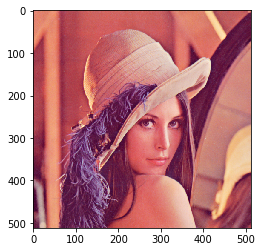

In [336]:
img = mpimg.imread("C:\\Users\\moham\\OneDrive\\Bureau\\lenna.png")            # Lecture de l'image sur laquelle on va travailler
plt.imshow(img)                            # Affichage de l'image
img.shape  

In [337]:
n,m,a=img.shape 

## 1 Rotation

In [338]:
def rotation(img,angleDeg,n,m):
    angle=np.radians(angleDeg)
    R=np.array([[np.cos(angle),np.sin(angle)*(-1),0],
                [np.sin(angle),np.cos(angle),0],
                [0,0,1]])
    img_rotation  = np.zeros((n,m,3))
    i=0
    while i < n: 
        j=0
        while j < m: 
            point=R.dot(np.array([i,j,1])).astype(int)
            x1=point[0]
            y1=point[1]
            if x1 >= 0 and y1 >= 0 and x1 < n and y1 < m:
                img_rotation[x1][y1] = img[i][j]
            j+=1
        i+=1
   
    return img_rotation

Rotation par  15  degre


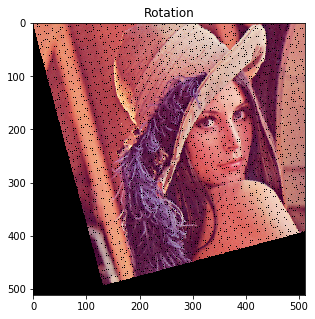

In [339]:
angle=15
f, axs = plt.subplots(1,1,figsize=(5,5))
plt.subplot(1,1,1)
print("Rotation par ", angle , " degre")
plt.title('Rotation')
plt.imshow(rotation(img,angle,n,m))

## 2 Translation

In [340]:
def translation(img,dx,dy,n,m):
    T=np.array([[1,0,dx],
                [0,1,dy],
                [0,0,1]])
    img_translation = np.zeros((n,m,3))
    i=0
    while i < n: 
        j=0
        while j < m:
            point=T.dot(np.array([i,j,1])).astype(int)
            x=point[0]
            y=point[1]
            if x >= 0 and y >= 0 and x < n and y < m:
                img_translation[x][y] = img[i][j]
            j+=1
        i+=1
   
    return img_translation

Translation par dx =  85  et dy = 95


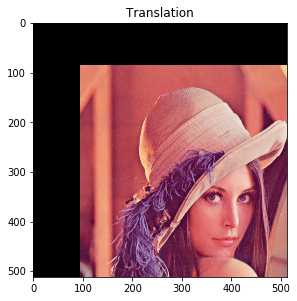

In [341]:
dx=85
dy=95
f, axs = plt.subplots(1,1,figsize=(10,10))
plt.subplot(1,2,1)
print("Translation par dx = ",dx, " et dy =",dy)
plt.title('Translation')
plt.imshow(translation(img,dx,dy,n,m))

## 3 Rotation apres Translation

Rotation par  15  degre apres Translation par dx =  85  et dy = 95


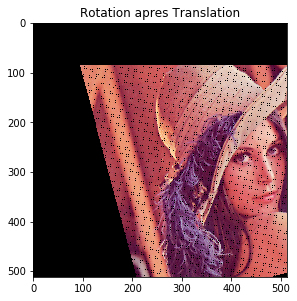

In [342]:
f, axs = plt.subplots(1,1,figsize=(10,10))
plt.subplot(1,2,1)
print("Rotation par ", angle , " degre apres Translation par dx = ",dx, " et dy =",dy)
plt.title('Rotation apres Translation')
rot = np.zeros((n,m,3))
rot = rotation(img,angle,n,m)
plt.imshow(translation(rot,dx,dy,n,m))

## 4 Translation apres Rotation 

Translation par dx =  85  et dy = 95  apres Rotation par  15  degre


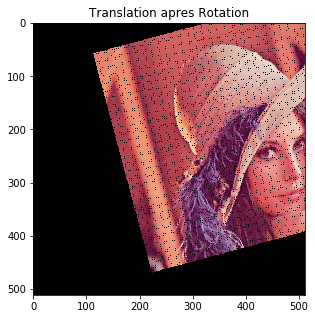

In [343]:
f, axs = plt.subplots(1,1,figsize=(5,5))
plt.subplot(1,1,1)
print("Translation par dx = ",dx, " et dy =",dy, " apres Rotation par ", angle , " degre")
plt.title('Translation apres Rotation')
trans = np.zeros((n,m,3))
trans = translation(img,dx,dy,n,m)
plt.imshow(rotation(trans,angle,n,m))

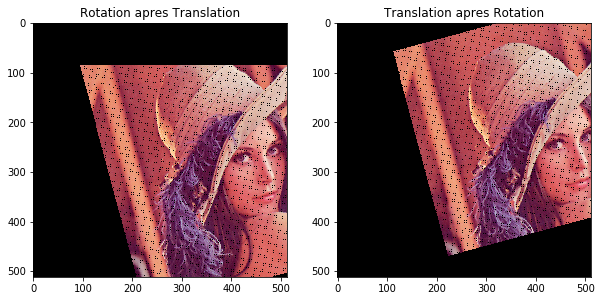

In [344]:
f, axs = plt.subplots(1,2,figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Rotation apres Translation')
rot = np.zeros((n,m,3))
rot = rotation(img,angle,n,m)
plt.imshow(translation(rot,dx,dy,n,m))
plt.subplot(1,2,2)
plt.title('Translation apres Rotation')
trans = np.zeros((n,m,3))
trans = translation(img,dx,dy,n,m)
plt.imshow(rotation(trans,angle,n,m))

## Remarque :
on a notez qu'il existe une différence entre les deux images, donc l'ordre des transformations Rotation et Translation n'est pas facultatif